# Load Data

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# for interactive plots replace 'inline' with 'widget' and run in standalone jupyter notebook/lab
import os
import os.path
from sepia.SepiaModelSetup import setup_model
from sepia.SepiaData import SepiaData as SepiaData
import numpy as np
import sepia.SepiaPlot as SepiaPlot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from nedderimp import nedderimp
from scipy.interpolate import interp2d
from copy import deepcopy
from sepia.SepiaOptim import SepiaOptim as SepiaOptim
import pandas as pd
import pickle

design = pickle.load(open('nedderDesign.pkl', "rb"))
data = pickle.load(open('nedderData.pkl', "rb"))

# Case 1: No optimization, use step size tuning

In [3]:
print(data)

This SepiaData instance implies the following:
This is a simulator and obs model, sim y dimension 572, obs y dimension ragged
n  =     3 (number of observed data)
m  =    36 (number of simulated data)
p  =     1 (number of inputs)
q  =     2 (number of additional simulation inputs to calibrate)
pu =     3 (transformed response dimension)
pv =    24 (transformed discrepancy dimension)
Categorical x input variables:
Categorical t input variables:



In [4]:
override=0
cachefile_name='neddermeyer_nooptim.pkl'
if os.path.isfile(cachefile_name) and override==0:
    model=pickle.load(open(cachefile_name, "rb" ))
else:
    model = setup_model(data)
    model.tune_step_sizes(50, 20, update_vals=True)
    model.do_mcmc(5000)
    pickle.dump(model, open( cachefile_name, "w+b" ))

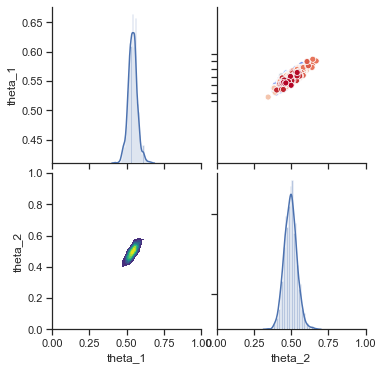

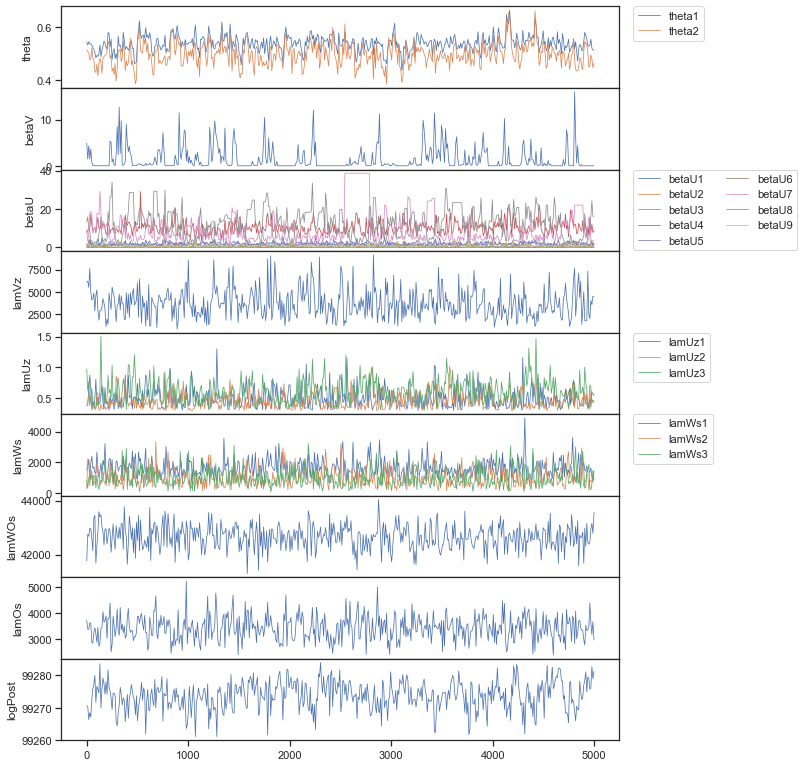

In [5]:
samples_dict = model.get_samples(nburn=1000,effectivesamples=False)
SepiaPlot.theta_pairs(samples_dict)
SepiaPlot.mcmc_trace(samples_dict)

In [6]:
SepiaPlot.param_stats(samples_dict)

,mean,sd,0.05 quantile,0.95 quantile
theta_1,0.5395,0.0301,0.4901,0.5871
theta_2,0.4962,0.0417,0.4275,0.5651
betaV,1.4456,2.6556,0.0011,6.8065
betaU_1,1.9756,0.7282,1.0240,3.3696
betaU_2,0.0669,0.0456,0.0205,0.1555
betaU_3,0.0958,0.0624,0.0317,0.2159
betaU_4,10.3461,3.2323,6.1340,16.6509
betaU_5,1.7954,0.9218,0.8219,3.5266
betaU_6,0.7324,0.3108,0.2892,1.2829
betaU_7,9.6418,8.4576,2.8814,29.2233


# Case 2: Optimization and step size tuning

In [13]:
override=1
cachefile_name='neddermeyer_optim.pkl'
if os.path.isfile(cachefile_name) and override==0:
    model2=pickle.load(open(cachefile_name, "rb" ))
else:
    model2=setup_model(data)
    optimizer = SepiaOptim(model2)
    opt_prm2, history2, p_native2 = optimizer.nelder_mead(maxiter=10000,step_tol=1,obj_tol=1,start='random',\
                                                          log_transform=['betaU','betaV','lamVz','lamWs','lamWOs','lamOs'])
    model2.tune_step_sizes(50, 20, update_vals=False)
    model2.do_mcmc(5000)
    pickle.dump(model2, open( cachefile_name, "w+b" ))

Step size tuning:   0%|          | 0/50 [00:00<?, ?it/s]

Optimization terminated successfully.
         Current function value: -98942.174773
         Iterations: 1438
         Function evaluations: 2224
logPost value: -98942.17477258385
  param  init value  opt value native
  theta    0.220259          0.233010
  theta    0.897073          0.996291
  betaV    0.262651          1.483983
  betaU    2.448170          7.475237
  betaU   -0.090126          0.894247
  betaU    1.156802          4.914456
  betaU    0.353018          1.354710
  betaU    0.158692          1.253684
  betaU   -0.844983          0.408789
  betaU   -0.122064          0.761346
  betaU    1.340104         13.979363
  betaU   -0.953160          1.088783
  lamVz   11.334622       1059.729366
  lamUz    0.784321          0.320673
  lamUz    4.886321          0.300335
  lamUz    4.716714          0.309872
  lamWs    4.390684        108.533224
  lamWs    5.003371         97.861352
  lamWs    9.750807         72.816174
 lamWOs   10.429358      42581.576351
  lamOs    1.773657  

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

Done with tune_step_size.
Selected step sizes:
theta
[[0.13455789 0.30718284]]
betaV
[[0.14877877]]
betaU
[[0.89708916 0.45994577 0.91039945]
 [0.05561823 0.80623737 0.19340455]
 [0.08551487 0.47925851 0.65822541]]
lamVz
[[15855.76915722]]
lamUz
[[0.89360375 0.70161931 0.98241885]]
lamWs
[[4243.02233525 4722.89949316 4674.14339898]]
lamWOs
[[4134.90862267]]
lamOs
[[6259.74567551]]


MCMC sampling: 100%|██████████| 5000/5000 [01:17<00:00, 64.77it/s]


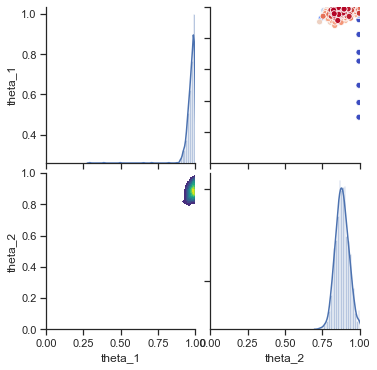

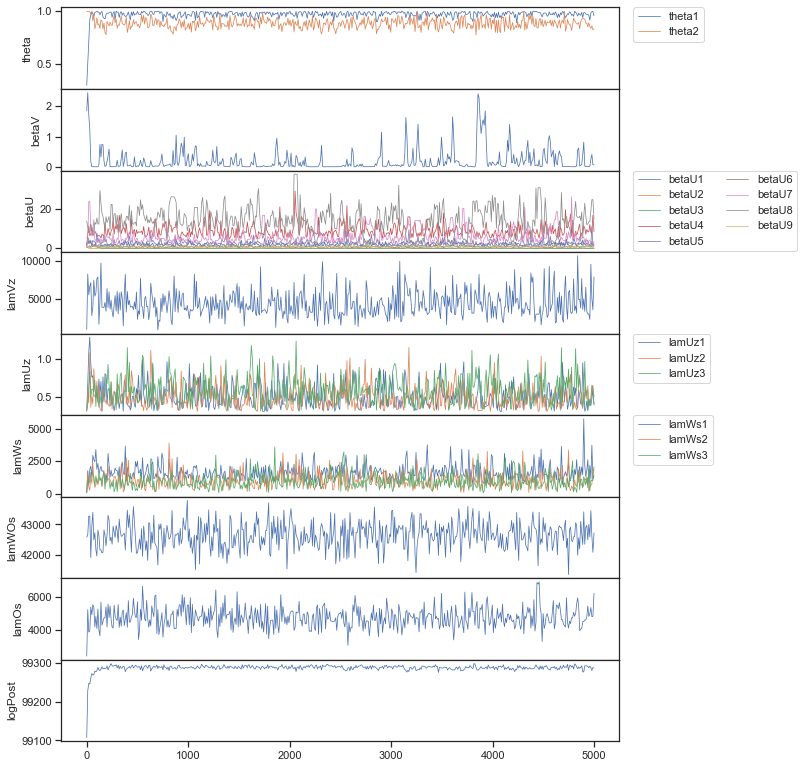

In [14]:
samples_dict2 = model2.get_samples(nburn=1000,effectivesamples=False)
SepiaPlot.theta_pairs(samples_dict2)
SepiaPlot.mcmc_trace(samples_dict2)

# Case 3: no optimization or step size tunings

In [15]:
override=0
cachefile_name='neddermeyer_noopt_nostep.pkl'
if os.path.isfile(cachefile_name) and override==0:
    model3=pickle.load(open(cachefile_name, "rb" ))
else:
    model3 = setup_model(data)
    model3.do_mcmc(5000)
    pickle.dump(model3, open( cachefile_name, "w+b" ))

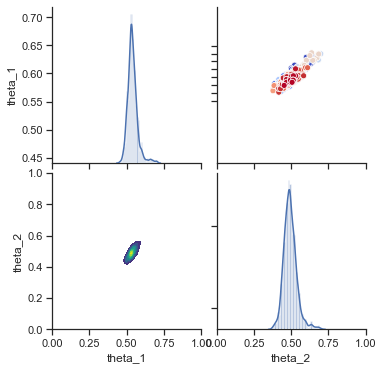

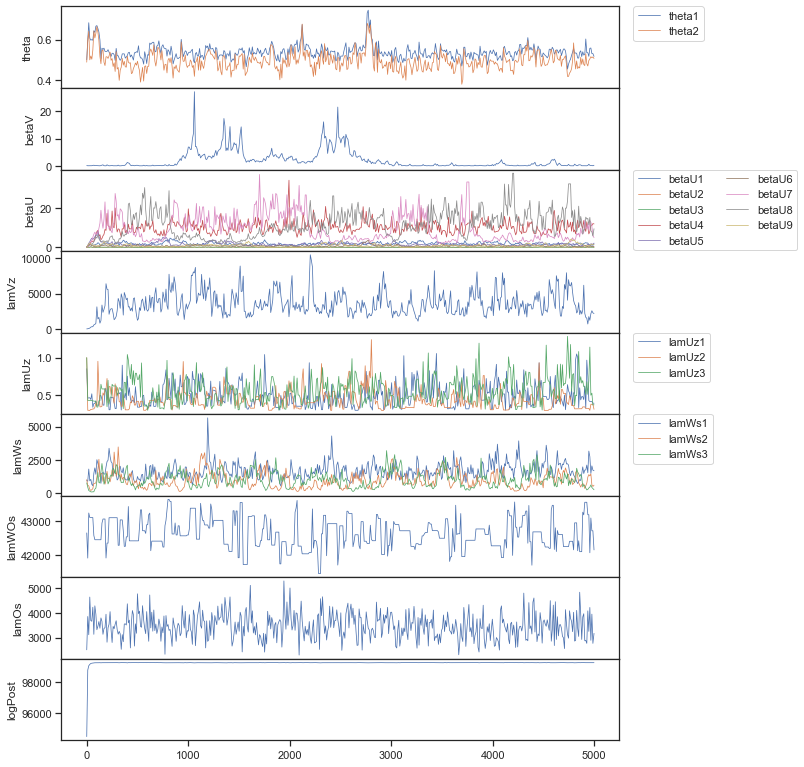

In [16]:
samples_dict3 = model3.get_samples(nburn=1000,effectivesamples=False)
SepiaPlot.theta_pairs(samples_dict3)
SepiaPlot.mcmc_trace(samples_dict3)

# Case 4: optimization no step size tuning

In [19]:
override=0
cachefile_name='neddermeyer_opt_nostep.pkl'
if os.path.isfile(cachefile_name) and override==0:
    model4=pickle.load(open(cachefile_name, "rb" ))
else:
    model4 = setup_model(data)
    optimizer = SepiaOptim(model4)
    opt_prm4, history4, p_native4 = optimizer.nelder_mead(maxiter=10000,step_tol=1,obj_tol=1,log_transform=['betaU','betaV','lamVz','lamWs','lamWOs','lamOs'])
    model4.do_mcmc(5000)
    pickle.dump(model4, open( cachefile_name, "w+b" ))

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

Optimization terminated successfully.
         Current function value: -99046.198678
         Iterations: 2510
         Function evaluations: 3711
logPost value: -99046.19867823903
  param  init value  opt value native
  theta    0.500000          0.944161
  theta    0.500000          0.988721
  betaV   -0.900000          0.000040
  betaU   -0.900000          0.504918
  betaU   -0.900000          0.256164
  betaU   -0.900000          0.786835
  betaU   -0.900000          2.246118
  betaU   -0.900000          0.459603
  betaU   -0.900000          0.585166
  betaU   -0.900000          1.981117
  betaU   -0.900000          1.392566
  betaU   -0.900000          2.140592
  lamVz    2.995732          6.766363
  lamUz    1.000000          2.924495
  lamUz    1.000000          1.841369
  lamUz    1.000000          3.252014
  lamWs    6.907755        265.094140
  lamWs    6.907755         60.757851
  lamWs    6.907755         60.501720
 lamWOs   10.660909      42565.152112
  lamOs    7.938419  

MCMC sampling: 100%|██████████| 5000/5000 [01:25<00:00, 58.43it/s]


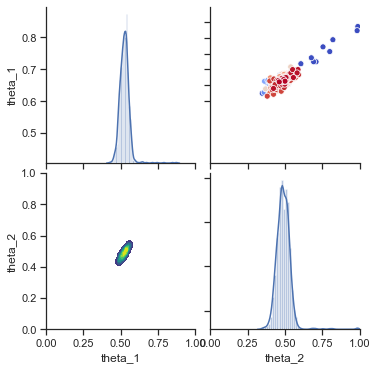

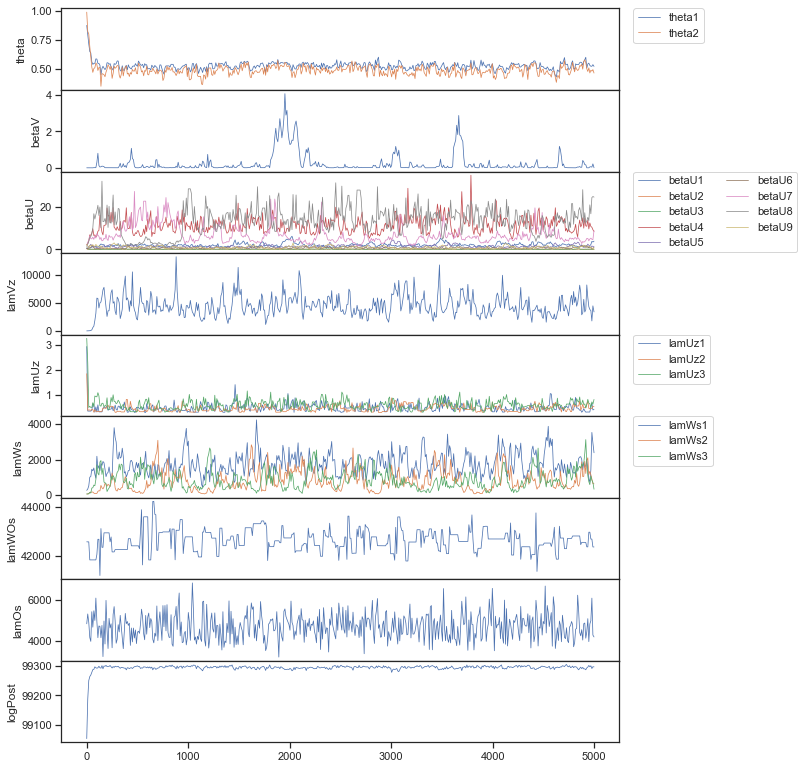

In [20]:
samples_dict4 = model4.get_samples(nburn=1000,effectivesamples=False)
SepiaPlot.theta_pairs(samples_dict4)
SepiaPlot.mcmc_trace(samples_dict4)

# ACF

### Case 1: Step Size Tuning, No Optimization

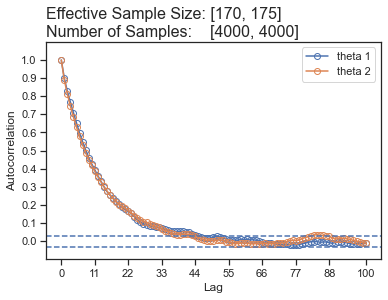

0.04375


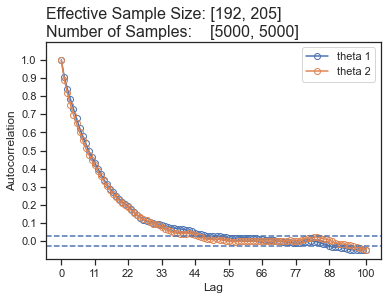

0.041


In [21]:
_ = SepiaPlot.plot_acf(model,nlags=100,nburn=1000); print(175/4000)
_ = SepiaPlot.plot_acf(model,nlags=100,nburn=0); print(205/5000)

### Case 2: Optimization AND Step Size Tuning

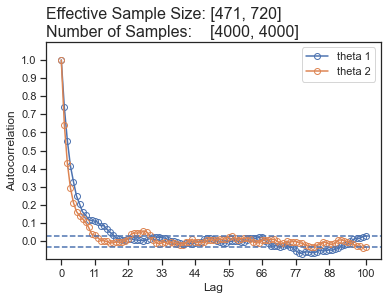

0.18


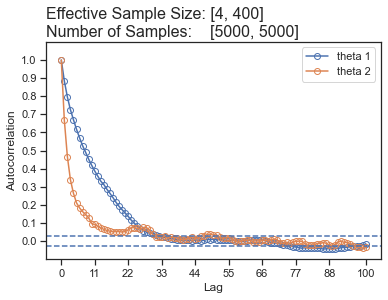

0.08


In [25]:
_ = SepiaPlot.plot_acf(model2,nlags=100,nburn=1000); print(720/4000)
_ = SepiaPlot.plot_acf(model2,nlags=100,nburn=0); print(400/5000)

### Case 3: No Optimization, No Step Size Tuning

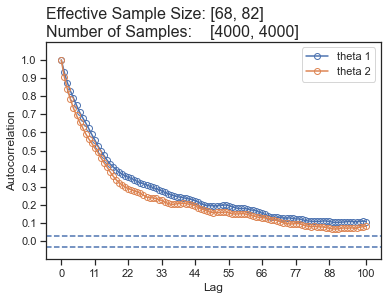

0.0205


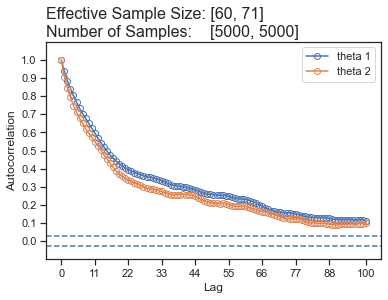

0.0142


In [23]:
_ = SepiaPlot.plot_acf(model3,nlags=100,nburn=1000); print(82/4000)
_ = SepiaPlot.plot_acf(model3,nlags=100,nburn=0); print(71/5000)

### Case 4: Optimization, No Step Size Tuning

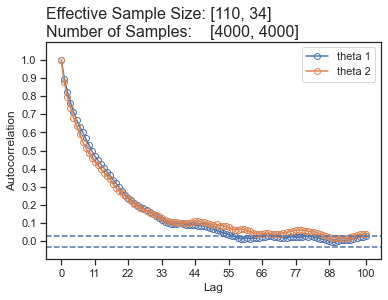

0.03825


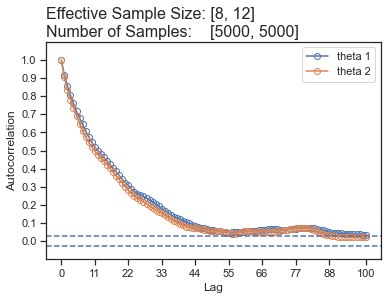

0.0318


In [24]:
_ = SepiaPlot.plot_acf(model4,nlags=100,nburn=1000); print(153/4000)
_ = SepiaPlot.plot_acf(model4,nlags=100,nburn=0); print(159/5000)

# ###########################################################################
# Optimization Study - vary parameters for PSO and Tolerances for Nelder-Mead

# Nelder-mead with different tolerances

In [75]:
tols = np.linspace(.001,10,design.shape[0])
override=1
cachefile_name='optimstudy_nelder_mead.pkl'
if os.path.isfile(cachefile_name) and override==0:
    nm_out=pickle.load(open(cachefile_name, "rb" ))
else:
    nm_out = [None]*len(tols)
    for i in range(len(nm_out)):
        print(i)
        model_nm = setup_model(data)
        optimizer = SepiaOptim(model_nm)
        nm_out[i] = optimizer.nelder_mead(maxiter=100000,step_tol=tols[i],obj_tol=tols[i],\
                                          log_transform=['betaU','betaV','lamUz','lamVz','lamWs','lamWOs','lamOs'])
    pickle.dump(nm_out, open( 'optimstudy_nelder_mead.pkl', "w+b" ))

0
Optimization terminated successfully.
         Current function value: -99287.203277
         Iterations: 28601
         Function evaluations: 40226
logPost value: -99287.20327713003
  param  init value  opt value native
  theta    0.500000          1.000000
  theta    0.500000          0.892621
  betaV   -0.900000          0.294647
  betaU   -0.900000          2.518603
  betaU   -0.900000          0.055714
  betaU   -0.900000          0.089786
  betaU   -0.900000         11.245643
  betaU   -0.900000          2.015734
  betaU   -0.900000          0.838358
  betaU   -0.900000         74.435444
  betaU   -0.900000          6.552641
  betaU   -0.900000          0.001366
  lamVz    2.995732       4472.301550
  lamUz    0.000000          1.028929
  lamUz    0.000000          1.017656
  lamUz    0.000000          0.970481
  lamWs    6.907755       1344.477993
  lamWs    6.907755         60.040150
  lamWs    6.907755       1028.575005
 lamWOs   10.660909      42647.955528
  lamOs    7.9384

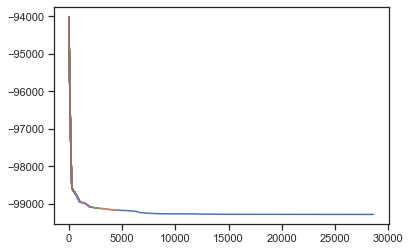

     n_iter  f_evals       max_obj    theta1    theta2
0   28601.0  40226.0  99287.203277  1.000000  0.892621
1    4549.0   6565.0  99173.843282  0.912673  0.999086
2    2869.0   4244.0  99126.345091  0.714340  0.873727
3    2163.0   3221.0  99097.643274  0.797389  0.941552
4    2111.0   3140.0  99096.084437  0.806671  0.952076
5    1277.0   1902.0  98971.479147  0.971051  0.994722
6    1251.0   1862.0  98970.217623  0.965737  0.990810
7    1237.0   1843.0  98969.494391  0.970738  0.999220
8    1220.0   1815.0  98968.568432  0.970426  0.994337
9    1176.0   1746.0  98964.775617  0.970435  0.991482
10   1154.0   1713.0  98962.707577  0.966700  0.991343
11   1118.0   1661.0  98959.423980  0.973369  0.999797
12   1117.0   1660.0  98959.423980  0.973369  0.999797
13   1090.0   1620.0  98956.869347  0.967553  0.992423
14   1088.0   1617.0  98956.869347  0.967553  0.992423
15   1087.0   1616.0  98956.869347  0.967553  0.992423
16   1082.0   1608.0  98956.520773  0.969783  0.992925
17   1080.

In [76]:
df_nm = pd.DataFrame(columns=['n_iter','f_evals', 'max_obj', 'theta1', 'theta2'])
for i,tmp in enumerate(nm_out):
    df_nm.loc[i] = [tmp[0]['nit'], tmp[0]['nfev'], -1*tmp[0]['fun'], tmp[0]['x'][0], tmp[0]['x'][1]]
    plt.plot(tmp[1])
plt.show()
print(df_nm.sort_values('max_obj',ascending=False))

# Nelder-mead with random start location and fixed tolerance

In [28]:
override=0
cachefile_name='optimstudy_nelder_mead_random.pkl'
if os.path.isfile(cachefile_name) and override==0:
    nm_out_rand=pickle.load(open(cachefile_name, "rb" ))
else:
    nm_out_rand = [None]*len(tols)
    for i in range(len(nm_out)):
        print(i)
        model_nm = setup_model(data)
        optimizer = SepiaOptim(model_nm)
        nm_out_rand[i] = optimizer.nelder_mead(maxiter=100000,step_tol=1,obj_tol=1,start='random',\
                                               log_transform=['betaU','betaV','lamUz','lamVz','lamWs','lamWOs','lamOs'])
    pickle.dump(nm_out_rand, open( cachefile_name, "w+b" ))

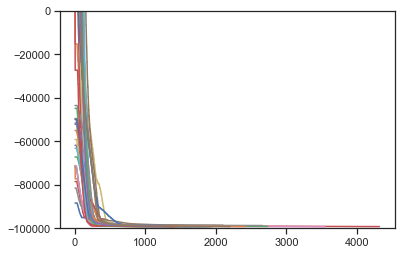

    n_iter  f_evals       max_obj    theta1    theta2
16  3549.0   4965.0  99259.866920  0.344008  0.323059
17  1868.0   2523.0  99225.542545  0.521501  0.412416
28  1299.0   1752.0  99220.041495  0.318919  0.111769
11  1612.0   2210.0  99214.564503  0.187774  0.107663
29  1359.0   1832.0  99211.977997  0.555972  0.529922
5   1930.0   2740.0  99206.056901  0.480910  0.174147
3   4323.0   6088.0  99205.579557  0.165348  0.144256
23  1402.0   1933.0  99203.987727  0.438443  0.392909
15  1916.0   2735.0  99197.307277  0.991420  0.995222
35  2203.0   3121.0  99191.886492  0.695630  0.621201
10  1656.0   2319.0  99190.312518  0.833806  0.999932
4   1305.0   1817.0  99180.323731  0.985708  0.140759
19  1956.0   2734.0  99176.217371  0.121984  0.093560
6   1386.0   1888.0  99174.945981  0.001899  0.522377
31  2422.0   3461.0  99173.409106  0.133310  0.568026
13  1413.0   2070.0  99172.798144  0.067632  0.223633
32  1043.0   1433.0  99172.788044  0.323105  0.777398
24  1314.0   1813.0  99170.0

In [29]:
df_nm_rand = pd.DataFrame(columns=['n_iter','f_evals', 'max_obj', 'theta1', 'theta2'])
for i,tmp in enumerate(nm_out_rand):
    df_nm_rand.loc[i] = [tmp[0]['nit'], tmp[0]['nfev'], -1*tmp[0]['fun'], tmp[0]['x'][0], tmp[0]['x'][1]]
    plt.plot(tmp[1])
plt.ylim(-100000,0)
plt.show()
print(df_nm_rand.sort_values('max_obj',ascending=False))

# Pyswarm particle swarm optimization

### default parameters, linearly decreasing intertia .9->.4, c1=.5, c2=.3

In [30]:
model_pso = setup_model(data)
optimizer = SepiaOptim(model_pso)

In [31]:
x_opt, f_opt, f_hist, it, fnc_calls, p_native = optimizer.particle_swarm(maxiter=500,swarmsize=100,\
                                                            log_transform=['betaU','betaV','lamVz','lamUz','lamWs','lamWOs','lamOs'],\
                                                              w_max=.9,w_min=.4,c1=.5,c2=.3)

  0%|          | 0/500 [00:00<?, ?it/s]

optimization bounds: ([0, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1.2039728043259361, -1.2039728043259361, -1.2039728043259361, 4.0943445622221, 4.0943445622221, 4.0943445622221, 4.0943445622221, -1], [1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 11.512925464970229, 11.512925464970229, 11.512925464970229, 11.512925464970229, 11.512925464970229, 11.512925464970229, 11.512925464970229, 11.512925464970229, 11.512925464970229])


 57%|█████▋    | 286/500 [00:45<00:33,  6.35it/s]

Stopping search: Swarm best position change less than 1e-08
max obj fnc: -99243.50598831907
  param  opt value native
  theta          0.141034
  theta          0.116556
  betaV          3.493040
  betaU          1.338925
  betaU          2.004158
  betaU          0.051713
  betaU         11.350746
  betaU          1.516759
  betaU         19.725966
  betaU         10.904603
  betaU          3.780429
  betaU          1.095743
  lamVz       3592.754436
  lamUz          0.426635
  lamUz          0.453782
  lamUz          0.504797
  lamWs       1704.631674
  lamWs        632.994934
  lamWs        643.328173
 lamWOs      42662.593976
  lamOs       4592.285485


-99243.50598831907


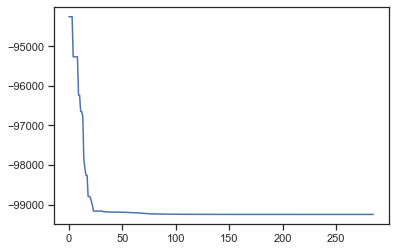

In [32]:
print(f_opt)
plt.plot(f_hist)

In [33]:
override=0
cachefile_name='neddermeyer_pso.pkl'
if os.path.isfile(cachefile_name) and override==0:
    model_pso=pickle.load(open(cachefile_name, "rb" ))
else:
    model_pso.tune_step_sizes(50, 20, update_vals=False)
    model_pso.do_mcmc(1000)
    pickle.dump(model_pso, open( cachefile_name, "w+b" ))

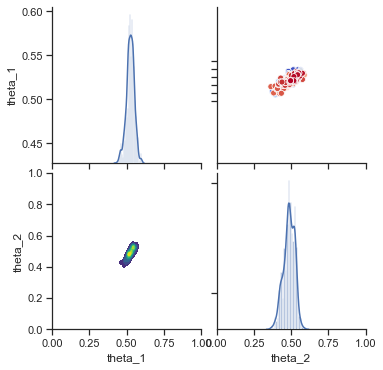

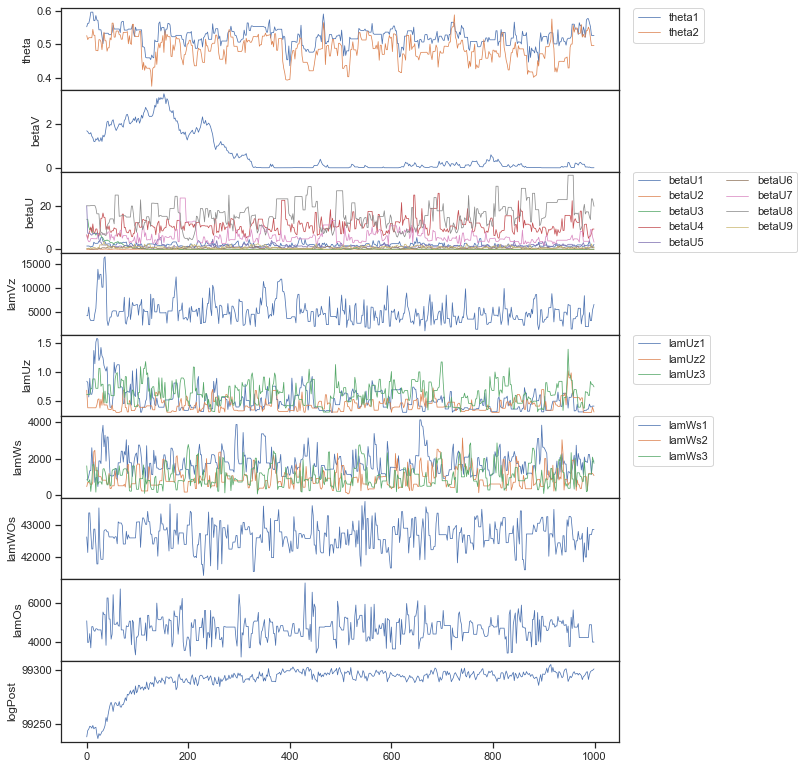

In [34]:
samples_dict_pso = model_pso.get_samples()
SepiaPlot.theta_pairs(samples_dict_pso)
SepiaPlot.mcmc_trace(samples_dict_pso)

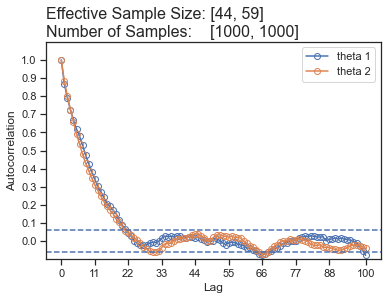

In [35]:
_ = SepiaPlot.plot_acf(model_pso,nlags=100,nburn=0)

## Latin Hypercube design with linearly decreasing w from .9 to .4

In [36]:
# try a bunch of parameters, we have a LHCD in 'design'
override=0
cachefile_name='optimstudy_lin_dec.pkl'
if os.path.isfile(cachefile_name) and override==0:
    out=pickle.load(open(cachefile_name, "rb" ))
else:
    model_pso = setup_model(data)
    optimizer = SepiaOptim(model_pso)
    out = [None]*design.shape[0]
    for i in range(len(out)):
        out[i] = [optimizer.particle_swarm(swarmsize=100,maxiter=500, w_max=.9, w_min=.4, c1=design[i,1], c2=design[i,2],\
                                          log_transform=['betaU','betaV','lamVz','lamUz','lamWs','lamWOs','lamOs']),design[i,:]]
    pickle.dump(out, open( 'optimstudy_lin_dec.pkl', "w+b" ))

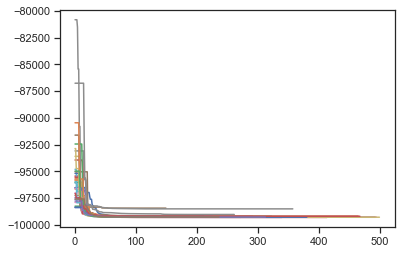

    n_iter       max_obj    theta1        theta2      c1      c2
3    415.0  99309.241486  0.520132  4.781205e-01  0.6000  0.8000
4    341.0  99304.704678  0.557881  5.379922e-01  0.6286  0.4000
23   274.0  99296.534251  0.519232  4.808954e-01  0.1714  0.8571
25   494.0  99294.990812  0.010414  9.000823e-03  0.4000  0.8286
30   382.0  99290.018351  0.068756  5.482056e-02  0.7429  0.5429
28   501.0  99288.943483  0.787636  7.086238e-01  0.8571  0.9143
6    335.0  99287.560264  0.994653  8.795856e-01  1.0000  0.6286
1    306.0  99285.240912  0.039106  3.996057e-02  0.1143  0.7143
18   280.0  99281.782087  0.490388  4.346475e-01  0.9143  0.3429
10   322.0  99281.698938  0.586764  5.262932e-01  0.2000  1.0000
16   496.0  99278.404668  0.741841  6.591327e-01  0.5714  0.7429
34   314.0  99277.702064  0.424989  2.503143e-01  0.9714  0.3143
21   295.0  99277.217842  0.999564  8.684282e-01  0.0857  0.9714
32   308.0  99276.690696  0.791328  7.131435e-01  0.3714  0.4286
20   264.0  99273.164345 

In [37]:
df_lw = pd.DataFrame(columns=['n_iter', 'max_obj', 'theta1', 'theta2', 'c1', 'c2'])
for i,tmp in enumerate(out):
    df_lw.loc[i] = [tmp[0][3], -1*tmp[0][1], tmp[0][0][0], tmp[0][0][1], tmp[1][1], tmp[1][2]]
    plt.plot(tmp[0][2])
plt.show()
print(df_lw.sort_values('max_obj',ascending=False))

## Latin Hypercube Design with constant w

In [38]:
override=0
cachefile_name='optimstudy.pkl'
if os.path.isfile(cachefile_name) and override==0:
    out2=pickle.load(open(cachefile_name, "rb" ))
else:
    out2 = [None]*design.shape[0]
    for i in range(len(out2)):
        out2[i] = [optimizer.particle_swarm(swarmsize=100,maxiter=500,w_max=design[i,0], w_min=design[i,0],\
                                                              c1=design[i,1], c2=design[i,2],\
                                           log_transform=['betaU','betaV','lamVz','lamUz','lamWs','lamWOs','lamOs']),design[i,:]]
    pickle.dump(out2, open( 'optimstudy.pkl', "w+b" ))

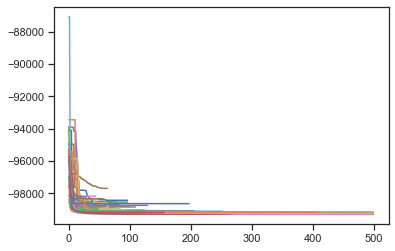

    run_index  n_iter       max_obj    theta1    theta2       w      c1  \
14       14.0   501.0  99309.242488  0.518133  0.478957  0.9143  0.8857   
26       26.0   501.0  99300.600266  0.098491  0.084226  0.9429  0.6857   
23       23.0   307.0  99289.181173  0.525605  0.488310  0.7143  0.1714   
9         9.0   455.0  99282.485960  0.554865  0.527886  0.6857  0.3143   
4         4.0   316.0  99280.651501  0.551272  0.534820  0.8000  0.6286   
10       10.0   501.0  99277.200041  0.999992  0.879211  0.8286  0.2000   
6         6.0   501.0  99255.088867  0.594852  0.626936  0.6571  1.0000   
19       19.0   501.0  99235.968047  0.597087  0.546876  0.6286  0.7143   
21       21.0   501.0  99232.950308  0.780298  0.554737  0.8857  0.0857   
28       28.0   501.0  99225.865560  0.426496  0.327353  1.0000  0.8571   
11       11.0   501.0  99204.467259  0.529384  0.458711  0.9714  0.3429   
33       33.0   158.0  99188.787563  0.361978  0.092268  0.4286  0.7714   
31       31.0   410.0  99

In [39]:
df_cw = pd.DataFrame(columns=['run_index', 'n_iter', 'max_obj', 'theta1', 'theta2', 'w', 'c1', 'c2'])
for i,tmp in enumerate(out2):
    df_cw.loc[i] = [i, tmp[0][3], -1*tmp[0][1], tmp[0][0][0], tmp[0][0][1], tmp[1][0], tmp[1][1], tmp[1][2]]
    plt.plot(tmp[0][2][0:500])
plt.show()
print(df_cw.sort_values('max_obj',ascending=False))

## First compare just particle swarm

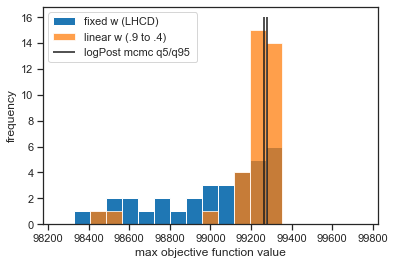

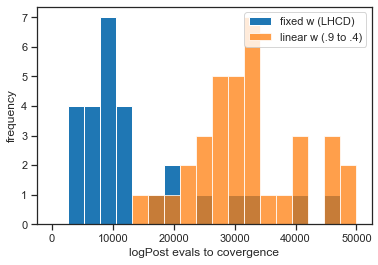

In [86]:
obj_bins = np.linspace(98250,99750,20)
fev_bins= np.linspace(0,50001,20)
lpq5 = 99266.2877; lpq95 = 99280.4342

plt.hist(df_cw['max_obj'],bins=obj_bins,alpha=1,color='#1f77b4',label='fixed w (LHCD)')
plt.xlabel('max objective function value'); plt.ylabel('frequency')
plt.hist(df_lw['max_obj'],bins=obj_bins,alpha=.75,color='#ff7f0e',label='linear w (.9 to .4)')
plt.vlines((lpq5,lpq95),ymin=0,ymax=16,label='logPost mcmc q5/q95 ') # quantiles for no optimization before mcmc 
plt.legend()
plt.savefig('maxobjswarm.png',dpi=300)
plt.show()
plt.hist(df_cw['n_iter']*100,bins=fev_bins,alpha=1,color='#1f77b4',label='fixed w (LHCD)')
plt.hist(df_lw['n_iter']*100,bins=fev_bins,alpha=.75,color='#ff7f0e',label='linear w (.9 to .4)')

plt.xlabel('logPost evals to covergence'); plt.ylabel('frequency')
plt.legend()
plt.savefig('iterswarm.png',dpi=300)
plt.show()

## Compare nelder-mead with particle swarm

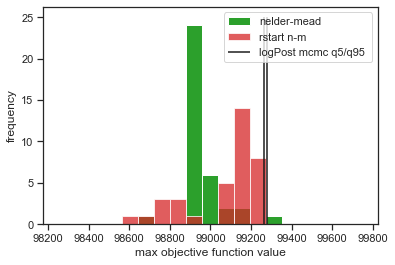

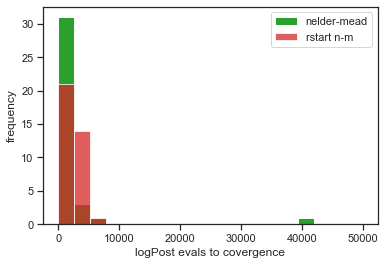

In [95]:
#plt.hist(df_cw['max_obj'],bins=obj_bins,alpha=1,color='#1f77b4',label='fixed w (LHCD)')
plt.xlabel('max objective function value'); plt.ylabel('frequency')
#plt.hist(df_lw['max_obj'],bins=obj_bins,alpha=.75,color='#ff7f0e',label='linear w (.9 to .4)')
plt.hist(df_nm['max_obj'],bins=obj_bins,alpha=1,color='#2ca02c',label='nelder-mead')
plt.hist(df_nm_rand['max_obj'],bins=obj_bins,alpha=.75,color='#d62728',label='rstart n-m')
plt.vlines((lpq5,lpq95),ymin=0,ymax=25,label='logPost mcmc q5/q95 ') # quantiles for no optimization before mcmc 
plt.legend()
plt.savefig('maxobjswarm_and_nm.png',dpi=300)
plt.show()
#plt.hist(df_cw['n_iter']*100,bins=fev_bins,alpha=1,color='#1f77b4',label='fixed w (LHCD)')
#plt.hist(df_lw['n_iter']*100,bins=fev_bins,alpha=.75,color='#ff7f0e',label='linear w (.9 to .4)')
plt.hist(df_nm['f_evals'],bins=fev_bins,alpha=1,color='#2ca02c',label='nelder-mead')
plt.hist(df_nm_rand['f_evals'],bins=fev_bins,alpha=.75,color='#d62728',label='rstart n-m')

plt.xlabel('logPost evals to covergence'); plt.ylabel('frequency')
plt.legend()
plt.savefig('iterswarm_and_nm.png',dpi=300)
plt.show()

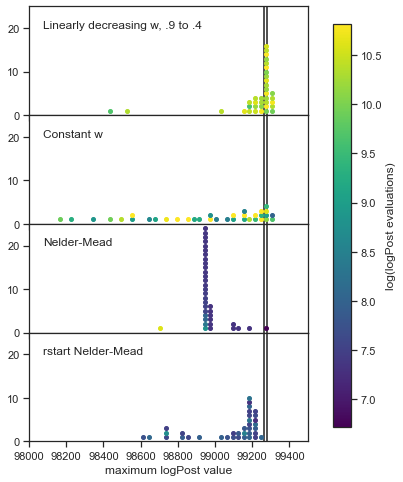

In [99]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
markersize=4
cmap = cm.viridis
vmin = min(min(df_lw['n_iter']*100),min(df_cw['n_iter']*100),min(df_nm['f_evals']),min(df_nm_rand['f_evals']))
vmax = max(max(df_lw['n_iter']*100),max(df_cw['n_iter']*100),max(df_nm['f_evals']),max(df_nm_rand['f_evals']))
norm = Normalize(vmin=np.log(vmin), vmax=np.log(vmax))

fig,axs = plt.subplots(nrows=4,sharex=True,figsize=(5,8))
xmin = 98000; xmax = 99500
ymin = 0; ymax = 25
nbins = 50
lpq5 = 99266.2877; lpq95 = 99280.4342

counts,bin_edges = np.histogram(df_lw['max_obj'],bins=nbins,range=(xmin,xmax))
# Centers via the mean to be robust to non-evenly spaced bins
bin_centers = np.mean(np.vstack((bin_edges[1:],bin_edges[:-1])),axis=0)
j = 0
for count,bin_center in zip(counts,bin_centers):
    y = np.arange(count)+1 # 1...count
    x = 0*y + bin_center
    for i in range(len(x)):
        axs[0].plot(x[i],y[i],'o',color=cmap(norm(np.log(df_lw['n_iter'][j]*100))),markersize=markersize)
        j+=1
axs[0].set_xlim((xmin,xmax))
axs[0].set_ylim((ymin,ymax))
axs[0].vlines((lpq5,lpq95),ymin=ymin,ymax=ymax)
axs[0].text(xmin+75,ymax*.8,'Linearly decreasing w, .9 to .4')

# constant w
counts,bin_edges = np.histogram(df_cw['max_obj'],bins=nbins,range=(xmin,xmax))
# Centers via the mean to be robust to non-evenly spaced bins
bin_centers = np.mean(np.vstack((bin_edges[1:],bin_edges[:-1])),axis=0)
j = 0
for count,bin_center in zip(counts,bin_centers):
    y = np.arange(count)+1 # 1...count
    x = 0*y + bin_center
    for i in range(len(x)):
        axs[1].plot(x[i],y[i],'o',color=cmap(norm(np.log(df_cw['n_iter'][j]*100))),markersize=markersize)
        j+=1  
axs[1].set_xlim((xmin,xmax))
axs[1].set_ylim((ymin,ymax))
axs[1].vlines((lpq5,lpq95),ymin=ymin,ymax=ymax)
axs[1].text(xmin+75,ymax*.8,'Constant w')
axs[1].set_xlabel('maximum logPost value')

# Nelder-mead
counts,bin_edges = np.histogram(df_nm['max_obj'],bins=nbins,range=(xmin,xmax))
# Centers via the mean to be robust to non-evenly spaced bins
bin_centers = np.mean(np.vstack((bin_edges[1:],bin_edges[:-1])),axis=0)
j = 0
for count,bin_center in zip(counts,bin_centers):
    y = np.arange(count)+1 # 1...count
    x = 0*y + bin_center
    for i in range(len(x)):
        axs[2].plot(x[i],y[i],'o',color=cmap(norm(np.log(df_nm['f_evals'][j]))),markersize=markersize)
        j+=1  
axs[2].set_xlim((xmin,xmax))
axs[2].set_ylim((ymin,ymax))
axs[2].vlines((lpq5,lpq95),ymin=ymin,ymax=ymax)
axs[2].text(xmin+75,ymax*.8,'Nelder-Mead')
axs[2].set_xlabel('maximum logPost value')

# random start Nelder-mead
counts,bin_edges = np.histogram(df_nm_rand['max_obj'],bins=nbins,range=(xmin,xmax))
# Centers via the mean to be robust to non-evenly spaced bins
bin_centers = np.mean(np.vstack((bin_edges[1:],bin_edges[:-1])),axis=0)
j = 0
for count,bin_center in zip(counts,bin_centers):
    y = np.arange(count)+1 # 1...count
    x = 0*y + bin_center
    for i in range(len(x)):
        axs[3].plot(x[i],y[i],'o',color=cmap(norm(np.log(df_nm_rand['f_evals'][j]))),markersize=markersize)
        j+=1  
axs[3].set_xlim((xmin,xmax))
axs[3].set_ylim((ymin,ymax))
axs[3].vlines((lpq5,lpq95),ymin=ymin,ymax=ymax)
axs[3].text(xmin+75,ymax*.8,'rstart Nelder-Mead')
axs[3].set_xlabel('maximum logPost value')

# colorbar
cax = fig.add_axes([.97, 0.15, 0.05, 0.7])
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap),
     cax=cax, orientation='vertical', label='log(logPost evaluations)')

plt.subplots_adjust(hspace=0)
plt.savefig('compareIters.png',dpi=300,bbox_inches = "tight")
plt.show()

# MCMC transient length

## Nelder-mead

### fixed start, change tolerance

In [83]:
override=0
#cachefile_name='nm_mcmc_transient_upd.pkl'
cachefile_name='nm_mcmc_transient.pkl'
if os.path.isfile(cachefile_name) and override==0:
    nm_models=pickle.load(open(cachefile_name, "rb" ))
else:
    nm_models = []
    for opt_results in nm_out:
        nm_models.append(setup_model(data))
        opt_params = opt_results[2]
        # set model param vals to opt values
        i=0
        for prm in nm_models[-1].params.mcmcList:
            # Loop over indices within parameter
            for ind in range(int(np.prod(prm.val_shape))):
                arr_ind = np.unravel_index(ind, prm.val_shape, order='F')
                prm.val[arr_ind] = opt_params[i]
                i+=1
        # run mcmc
        nm_models[-1].tune_step_sizes(50, 20, update_vals=False)
        nm_models[-1].do_mcmc(1000)
    pickle.dump(nm_models, open( 'nm_mcmc_transient.pkl', "w+b" ))

In [84]:
# get all 5% quantiles for logpost
nm_trans_len = []
for model in nm_models:
    samples = model.get_samples()
    q5 = np.quantile(samples['logPost'][500:],.05)
    nm_trans_len.append(np.argmax(samples['logPost']>q5))
df_nm['trans_len'] = nm_trans_len

### random start, fixed tolerance

In [51]:
override=0
cachefile_name='nm_rand_mcmc_transient.pkl'
if os.path.isfile(cachefile_name) and override==0:
    nm_rand_models=pickle.load(open(cachefile_name, "rb" ))
else:
    nm_rand_models = []
    for opt_results in nm_out_rand:
        nm_rand_models.append(setup_model(data))
        opt_params = opt_results[2]
        # set model param vals to opt values
        i=0
        for prm in nm_rand_models[-1].params.mcmcList:
            # Loop over indices within parameter
            for ind in range(int(np.prod(prm.val_shape))):
                arr_ind = np.unravel_index(ind, prm.val_shape, order='F')
                prm.val[arr_ind] = opt_params[i]
                i+=1
        # run mcmc
        nm_rand_models[-1].tune_step_sizes(50, 20, update_vals=False)
        nm_rand_models[-1].do_mcmc(1000)
    pickle.dump(nm_rand_models, open( 'nm_rand_mcmc_transient.pkl', "w+b" ))

In [52]:
# get all 5% quantiles for logpost
trans_len = []
for model in nm_rand_models:
    samples = model.get_samples()
    q5 = np.quantile(samples['logPost'][500:],.05)
    trans_len.append(np.argmax(samples['logPost']>q5))
df_nm_rand['trans_len'] = trans_len

## linear decreasing w

In [57]:
override=0
cachefile_name='linWmcmcTransient.pkl'
if os.path.isfile(cachefile_name) and override==0:
    models=pickle.load(open(cachefile_name, "rb" ))
else:
    models = []
    for opt_result in out:
        models.append(setup_model(data))
        opt_params = opt_result[0][5]
        # set model param vals to opt values
        i = 0
        for prm in models[-1].params.mcmcList:
            # Loop over indices within parameter
            for ind in range(int(np.prod(prm.val_shape))):
                arr_ind = np.unravel_index(ind, prm.val_shape, order='F')
                prm.val[arr_ind] = opt_params[i]
                i+=1
        # run mcmc
        models[-1].tune_step_sizes(50, 20, update_vals=False)
        models[-1].do_mcmc(1000)  
    pickle.dump(models, open( 'linWmcmcTransient.pkl', "w+b" ))

In [58]:
# get all 5% quantiles for logpost
trans_len = []
for model in models:
    samples = model.get_samples()
    q5 = np.quantile(samples['logPost'][500:],.05)
    trans_len.append(np.argmax(samples['logPost']>q5))
df_lw['trans_len'] = trans_len

## constant w

In [59]:
override=0
cachefile_name='constWmcmcTransient.pkl'
if os.path.isfile(cachefile_name) and override==0:
    models2=pickle.load(open(cachefile_name, "rb" ))
else:
    models2 = []
    for opt_result in out2:
        models2.append(setup_model(data))
        opt_params = opt_result[0][5]
        # set model param vals to opt values
        i = 0
        for prm in models2[-1].params.mcmcList:
            # Loop over indices within parameter
            for ind in range(int(np.prod(prm.val_shape))):
                arr_ind = np.unravel_index(ind, prm.val_shape, order='F')
                prm.val[arr_ind] = opt_params[i]
                i+=1
        # run mcmc
        models2[-1].tune_step_sizes(50, 20, update_vals=False)
        models2[-1].do_mcmc(1000) 
    pickle.dump(models2, open( 'constWmcmcTransient.pkl', "w+b" ))

In [60]:
# get all 5% quantiles for logpost
trans_len2 = []
for model in models2:
    samples = model.get_samples()
    q5 = np.quantile(samples['logPost'][500:],.05)
    trans_len2.append(np.argmax(samples['logPost']>q5))
df_cw['trans_len'] = trans_len2

### compare methods mcmc transient length vs convergence time

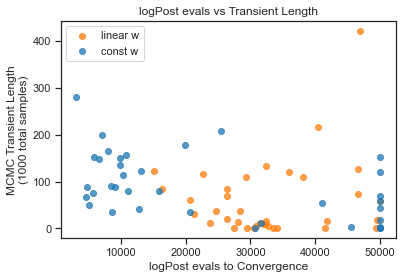

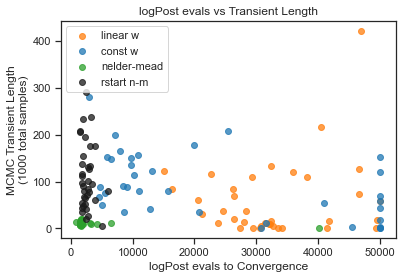

In [90]:
plt.scatter(df_lw['n_iter']*100,df_lw['trans_len'],label='linear w',color='#ff7f0e',alpha=.75)
plt.scatter(df_cw['n_iter']*100,df_cw['trans_len'],label='const w',color='#1f77b4',alpha=.75)
plt.title('logPost evals vs Transient Length')
plt.xlabel('logPost evals to Convergence')
plt.ylabel('MCMC Transient Length\n(1000 total samples)')
plt.legend()
plt.savefig('itervstransient.png',dpi=300,bbox_inches = "tight")
plt.show()

plt.scatter(df_lw['n_iter']*100,df_lw['trans_len'],label='linear w',color='#ff7f0e',alpha=.75)
plt.scatter(df_cw['n_iter']*100,df_cw['trans_len'],label='const w',color='#1f77b4',alpha=.75)
plt.scatter(df_nm['f_evals'],df_nm['trans_len'],label='nelder-mead',color='#2ca02c',alpha=.75)
plt.scatter(df_nm_rand['f_evals'],df_nm_rand['trans_len'],label='rstart n-m',color='k',alpha=.75)
plt.title('logPost evals vs Transient Length')
plt.xlabel('logPost evals to Convergence')
plt.ylabel('MCMC Transient Length\n(1000 total samples)')
plt.legend()
plt.savefig('itervstransient_and_nm.png',dpi=300,bbox_inches = "tight")
plt.show()

In [62]:
nm_samples_theta = np.zeros((design.shape[0]*1000,2))
i=0
for model in nm_models:
    nm_samples_theta[i:i+1000,:] = model.get_samples()['theta']
    i+=1000
nm_rand_samples_theta = np.zeros((design.shape[0]*1000,2))
i=0
for model in nm_rand_models:
    nm_rand_samples_theta[i:i+1000,:] = model.get_samples()['theta']
    i+=1000
cw_samples_theta = np.zeros((design.shape[0]*1000,2))
i=0
for model in models2:
    cw_samples_theta[i:i+1000,:] = model.get_samples()['theta']
    i+=1000
lw_samples_theta = np.zeros((design.shape[0]*1000,2))
i=0
for model in models:
    lw_samples_theta[i:i+1000,:] = model.get_samples()['theta']
    i+=1000

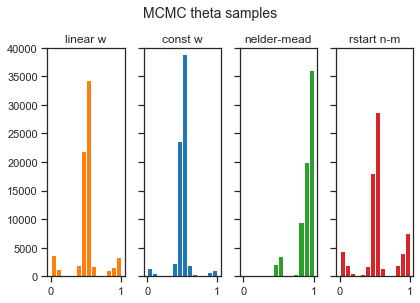

In [100]:
ylims = (0,40000)
bins = np.linspace(0,1,15,endpoint=True)
fig,axs = plt.subplots(1,4,sharey=True,tight_layout=True)
fig.suptitle("MCMC theta samples", fontsize=14,y=1.05)
axs[0].hist(lw_samples_theta.flatten(),bins=bins,color='#ff7f0e')
axs[0].set_title('linear w')
axs[0].set_ylim(ylims)

axs[1].hist(cw_samples_theta.flatten(),bins=bins,color='#1f77b4')
axs[1].set_title('const w')

axs[2].hist(nm_samples_theta.flatten(),bins=bins,color='#2ca02c')
axs[2].set_title('nelder-mead')

axs[3].hist(nm_rand_samples_theta.flatten(),bins=bins,color='#d62728')
axs[3].set_title('rstart n-m')
plt.show()

## Compare posterior means of theta for the three methods

In [65]:
# How many times does nelder-mead miss the mark with theta?
# how many chains does the second half mean not lie in .4-.6?
counts = np.zeros(4)
means = np.zeros((36,2))

i = 0
for model in models:
    means[i,:] = np.mean(model.get_samples()['theta'][500:,:],axis=0)
    if means[i,0] < .4 or means[i,0] > .6: counts[0]+=1
    if means[i,1] < .4 or means[i,1] > .6: counts[0]+=1
    i+=1

means2 = np.zeros((36,2))
i = 0
for model in models2:
    means2[i,:] = np.mean(model.get_samples()['theta'][500:,:],axis=0)
    if means2[i,0] < .4 or means2[i,0] > .6: counts[1]+=1
    if means2[i,1] < .4 or means2[i,1] > .6: counts[1]+=1
    i+=1

nm_means = np.zeros((36,2))
i=0
for model in nm_models:
    nm_means[i,:] = np.mean(model.get_samples()['theta'][500:,:],axis=0)
    if nm_means[i,0] < .4 or nm_means[i,0] > .6: counts[2]+=1
    if nm_means[i,1] < .4 or nm_means[i,1] > .6: counts[2]+=1
    i+=1
    
nm_rand_means = np.zeros((36,2))
i=0
for model in nm_rand_models:
    nm_rand_means[i,:] = np.mean(model.get_samples()['theta'][500:,:],axis=0)
    if nm_rand_means[i,0] < .4 or nm_rand_means[i,0] > .6: counts[3]+=1
    if nm_rand_means[i,1] < .4 or nm_rand_means[i,1] > .6: counts[3]+=1
    i+=1

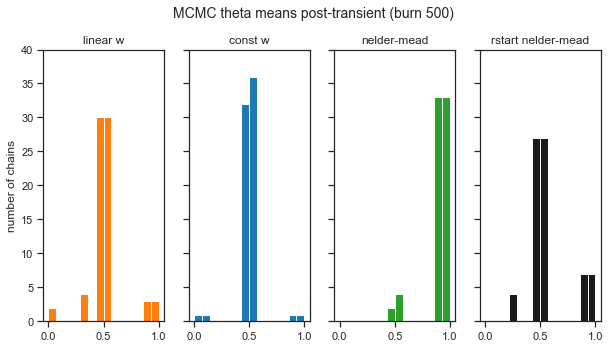

In [121]:
ylims = (0,40)
bins = np.linspace(0,1,15,endpoint=True)
fig,axs = plt.subplots(1,4,sharey=True,tight_layout=False,figsize=[10,5])
fig.suptitle("MCMC theta means post-transient (burn 500)", fontsize=14,y=1)
xticks = (0,.5,1)

axs[0].hist(means.flatten(),bins=bins,color='#ff7f0e')
axs[0].set_title('linear w')
axs[0].set_ylim(ylims)
axs[0].set_xticks(xticks)
axs[0].set_ylabel('number of chains')

axs[1].hist(means2.flatten(),bins=bins,color='#1f77b4')
axs[1].set_title('const w')
axs[1].set_xticks(xticks)

axs[2].hist(nm_means.flatten(),bins=bins,color='#2ca02c')
axs[2].set_title('nelder-mead')
axs[2].set_xticks(xticks)

axs[3].hist(nm_rand_means.flatten(),bins=bins,color='k')
axs[3].set_title('rstart nelder-mead')
axs[3].set_xticks(xticks)

plt.subplots_adjust(wspace=.2)
plt.savefig('theta_means.png',dpi=300,bbox_inches='tight')
plt.show()